In [192]:
#importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler


In [193]:
# import data

data = pd.read_csv("train.csv")
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
y.head()


0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

<Axes: xlabel='Transported'>

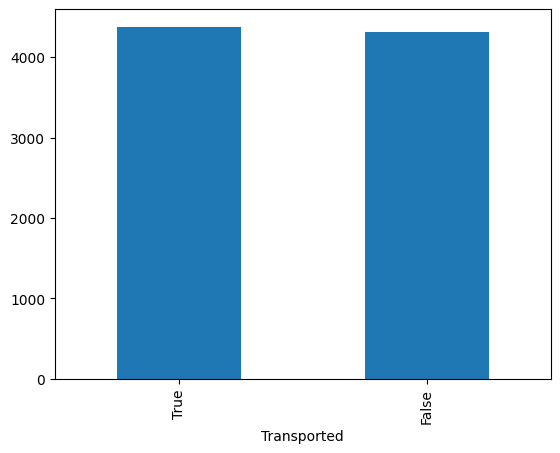

In [194]:
plot_df = data.Transported.value_counts()
plot_df.plot(kind="bar")

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

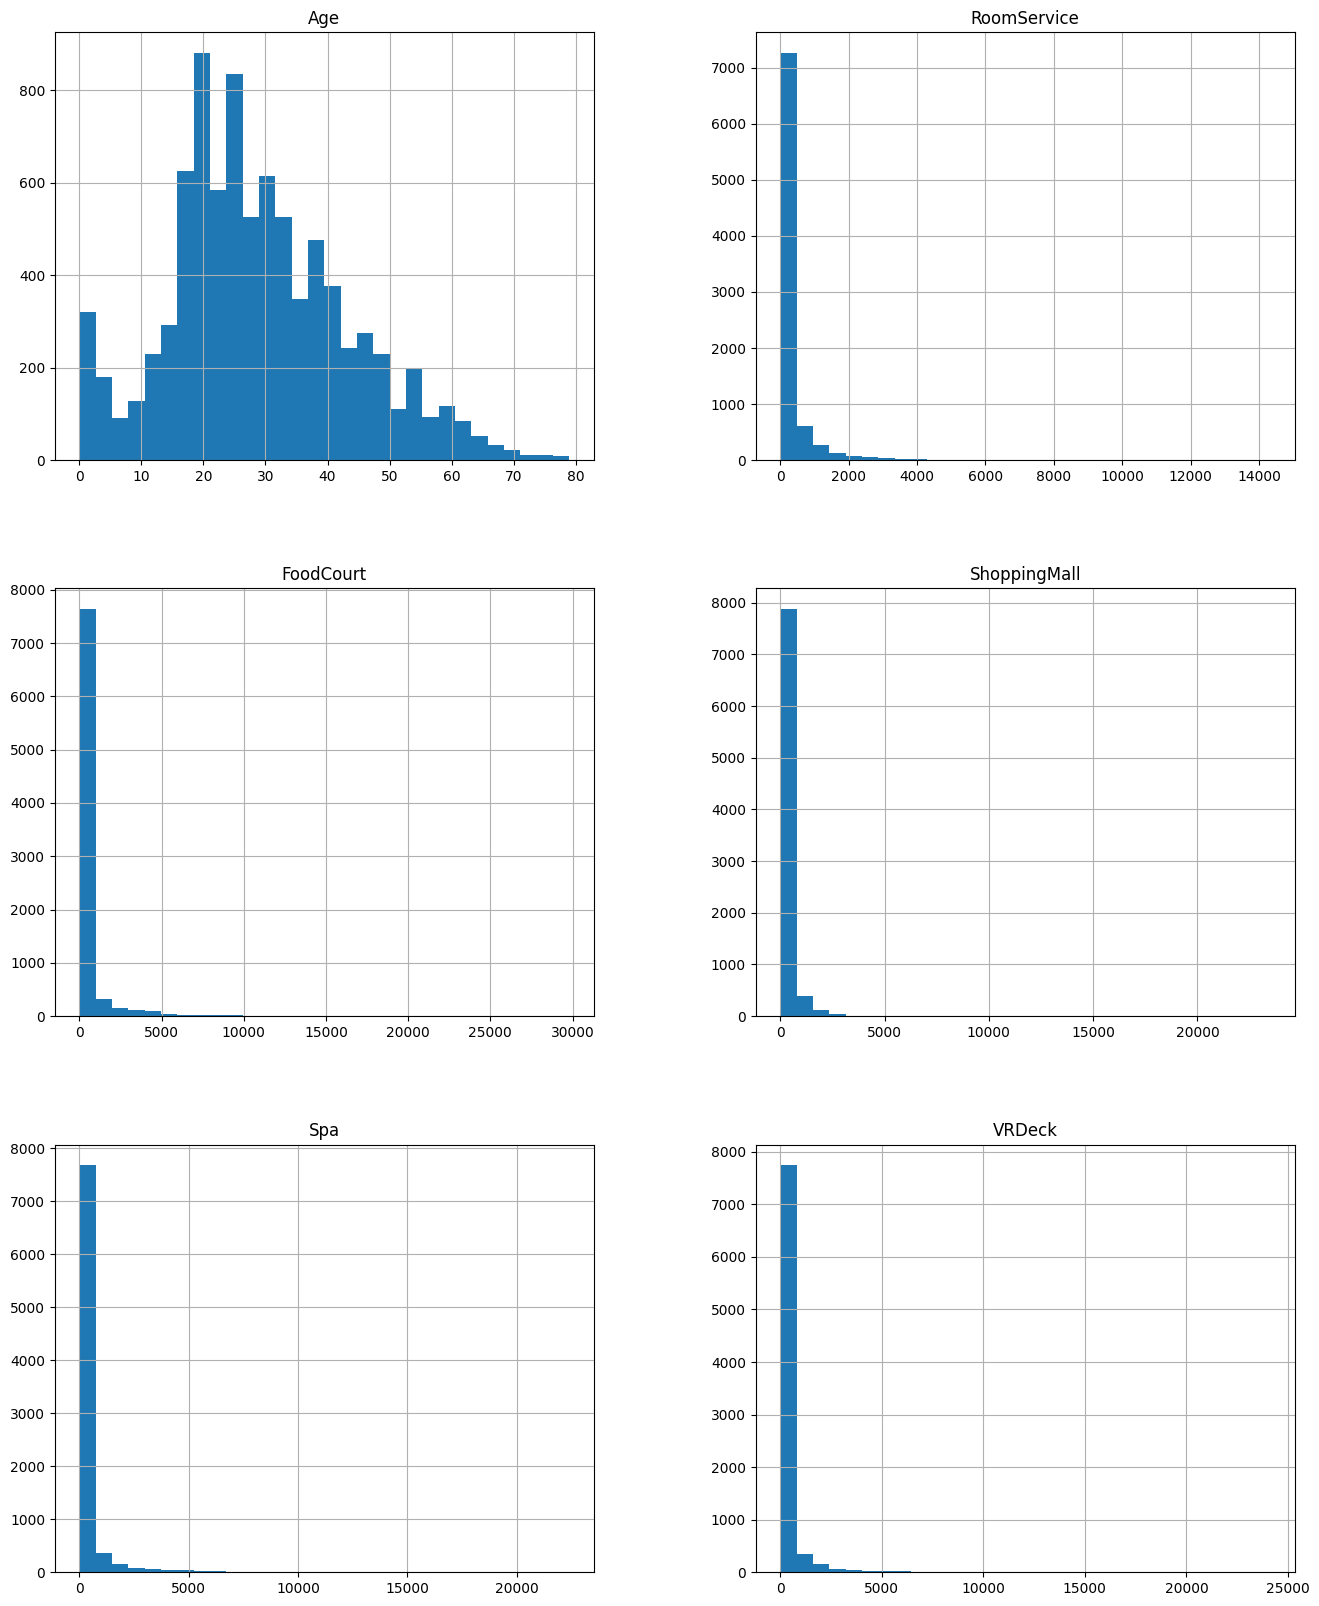

In [195]:
#Histograms
data.hist(figsize=(16,20), bins=30)

In [196]:
x=data.drop(['PassengerId', 'Name', 'Transported', 'Cabin'], axis =1)
x.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [197]:
# For True or False (yes or No )
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

x['VIP'] = le.fit_transform(x["VIP"])
x['CryoSleep'] = le.fit_transform(x["CryoSleep"])

In [198]:
# TAKING CARE OF MISSING DATA
x[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = x[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
x.isnull().sum().sort_values(ascending=False)
x.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0


In [199]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,2])], remainder='passthrough')
x =np.array(ct.fit_transform(x)) 
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0


In [203]:
#split data to train set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
